# Stock

In [1]:
import requests

### 1. data


In [2]:
url = 'https://finance.naver.com/item/sise_day.naver?code=006740&page=2'
page = requests.get(url)

print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [3]:
# 헤더 정보 설정
my_headers = {"user-agent": "Mozilla/5.0"}

# 요청 헤더 설정해서 HTTP 응답 받아오기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/world.css">
</head>
<body>
<script language="Jav

In [4]:
import pandas as pd

pages = pd.read_html(page.text)  # HTML 페이지에서 테이블 추출 

type(pages)

list

In [5]:
len(pages)

2

In [6]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.10.27,16650.0,7100.0,16650.0,16650.0,16650.0,12508.0
2,2023.10.26,23750.0,10150.0,23750.0,23750.0,23750.0,5438.0
3,2023.10.25,33900.0,0.0,0.0,0.0,0.0,0.0
4,2023.10.24,33900.0,0.0,0.0,0.0,0.0,0.0
5,2023.10.23,33900.0,0.0,0.0,0.0,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.10.20,33900.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [8]:
# 페이지 번호를 제외한 주소
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

all_tables = pd.DataFrame()

In [9]:
for page_number in range(1, 2):
    full_url = new_url + str(page_number)
    
    print(f"{page_number} 번째 페이지 읽어오기({full_url})")
    
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    
    print(f"전체 {len(all_tables.index)} 줄 에 {len(table.index)} 줄 추가")
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄 에 15 줄 추가


In [10]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.11.10,70500.0,200.0,70000.0,70500.0,69500.0,9087721.0
2,2023.11.09,70300.0,400.0,69900.0,70800.0,69600.0,12301373.0
3,2023.11.08,69900.0,1000.0,71300.0,71400.0,69700.0,12901310.0
4,2023.11.07,70900.0,0.0,70600.0,70900.0,70000.0,17228731.0
5,2023.11.06,70900.0,1300.0,69800.0,70900.0,69300.0,22228489.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.11.03,69600.0,100.0,69700.0,70200.0,69500.0,10322234.0


In [11]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.11.10,70500.0,200.0,70000.0,70500.0,69500.0,9087721.0
2,2023.11.09,70300.0,400.0,69900.0,70800.0,69600.0,12301373.0
3,2023.11.08,69900.0,1000.0,71300.0,71400.0,69700.0,12901310.0
4,2023.11.07,70900.0,0.0,70600.0,70900.0,70000.0,17228731.0
5,2023.11.06,70900.0,1300.0,69800.0,70900.0,69300.0,22228489.0
9,2023.11.03,69600.0,100.0,69700.0,70200.0,69500.0,10322234.0
10,2023.11.02,69700.0,1100.0,70000.0,70000.0,69400.0,16350031.0
11,2023.11.01,68600.0,1700.0,67500.0,68900.0,67300.0,13775256.0
12,2023.10.31,66900.0,400.0,67600.0,68300.0,66900.0,14488892.0
13,2023.10.30,67300.0,0.0,66800.0,67800.0,66700.0,10139270.0


In [13]:
all_tables = pd.DataFrame()

for page_number in range(1, 11):
    full_url = new_url + str(page_number)
    
    print(f"{page_number} 번째 페이지 읽어오기({full_url})")
    
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    
    print(f"전체 {len(all_tables.index)} 줄 에 {len(table.index)} 줄 추가")
    
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄 에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 15 줄 에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 30 줄 에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 45 줄 에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 60 줄 에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 75 줄 에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 90 줄 에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 105 줄 에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 120 줄 에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 135 줄 에 15 줄 추가


In [15]:
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.11.10,70500.0,200.0,70000.0,70500.0,69500.0,9087721.0
2,2023.11.09,70300.0,400.0,69900.0,70800.0,69600.0,12301373.0
3,2023.11.08,69900.0,1000.0,71300.0,71400.0,69700.0,12901310.0
4,2023.11.07,70900.0,0.0,70600.0,70900.0,70000.0,17228731.0
5,2023.11.06,70900.0,1300.0,69800.0,70900.0,69300.0,22228489.0
...,...,...,...,...,...,...,...
9,2023.06.22,71300.0,800.0,70200.0,71500.0,70100.0,11411007.0
10,2023.06.21,70500.0,900.0,70700.0,71200.0,70400.0,10626603.0
11,2023.06.20,71400.0,200.0,70700.0,71400.0,70400.0,11557883.0
12,2023.06.19,71200.0,600.0,71300.0,71700.0,70900.0,11100887.0


In [17]:
all_tables.rename(columns={'날짜': 'date', 
                   '종가': 'end_price', 
                   '시가': 'start_price', 
                   '고가': 'highest_price',
                   '저가': 'lowest_price'}
          , inplace=True)

all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.11.10,70500.0,200.0,70000.0,70500.0,69500.0,9087721.0
2,2023.11.09,70300.0,400.0,69900.0,70800.0,69600.0,12301373.0
3,2023.11.08,69900.0,1000.0,71300.0,71400.0,69700.0,12901310.0
4,2023.11.07,70900.0,0.0,70600.0,70900.0,70000.0,17228731.0
5,2023.11.06,70900.0,1300.0,69800.0,70900.0,69300.0,22228489.0
...,...,...,...,...,...,...,...
9,2023.06.22,71300.0,800.0,70200.0,71500.0,70100.0,11411007.0
10,2023.06.21,70500.0,900.0,70700.0,71200.0,70400.0,10626603.0
11,2023.06.20,71400.0,200.0,70700.0,71400.0,70400.0,11557883.0
12,2023.06.19,71200.0,600.0,71300.0,71700.0,70900.0,11100887.0


In [18]:
all_tables.drop(["전일비", "거래량"], axis=1, inplace=True)

all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.11.10,70500.0,70000.0,70500.0,69500.0
2,2023.11.09,70300.0,69900.0,70800.0,69600.0
3,2023.11.08,69900.0,71300.0,71400.0,69700.0
4,2023.11.07,70900.0,70600.0,70900.0,70000.0
5,2023.11.06,70900.0,69800.0,70900.0,69300.0
...,...,...,...,...,...
9,2023.06.22,71300.0,70200.0,71500.0,70100.0
10,2023.06.21,70500.0,70700.0,71200.0,70400.0
11,2023.06.20,71400.0,70700.0,71400.0,70400.0
12,2023.06.19,71200.0,71300.0,71700.0,70900.0


In [19]:
all_tables["median_price"] = all_tables["highest_price"] - ((all_tables["highest_price"] - all_tables["lowest_price"]) / 2)

all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price
1,2023.11.10,70500.0,70000.0,70500.0,69500.0,70000.0
2,2023.11.09,70300.0,69900.0,70800.0,69600.0,70200.0
3,2023.11.08,69900.0,71300.0,71400.0,69700.0,70550.0
4,2023.11.07,70900.0,70600.0,70900.0,70000.0,70450.0
5,2023.11.06,70900.0,69800.0,70900.0,69300.0,70100.0
...,...,...,...,...,...,...
9,2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0
10,2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0
11,2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0
12,2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0


In [20]:
all_tables["month"] = all_tables["date"].str[0:7]

all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price,month
1,2023.11.10,70500.0,70000.0,70500.0,69500.0,70000.0,2023.11
2,2023.11.09,70300.0,69900.0,70800.0,69600.0,70200.0,2023.11
3,2023.11.08,69900.0,71300.0,71400.0,69700.0,70550.0,2023.11
4,2023.11.07,70900.0,70600.0,70900.0,70000.0,70450.0,2023.11
5,2023.11.06,70900.0,69800.0,70900.0,69300.0,70100.0,2023.11
...,...,...,...,...,...,...,...
9,2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0,2023.06
10,2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0,2023.06
11,2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0,2023.06
12,2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0,2023.06


In [21]:
all_tables.set_index("date", inplace=True)

all_tables.sort_index(inplace=True)

all_tables

,end_price,start_price,highest_price,lowest_price,median_price,month
date,,,,,,
2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0,2023.06
2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0,2023.06
2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0,2023.06
2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0,2023.06
2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0,2023.06
...,...,...,...,...,...,...
2023.11.06,70900.0,69800.0,70900.0,69300.0,70100.0,2023.11
2023.11.07,70900.0,70600.0,70900.0,70000.0,70450.0,2023.11
2023.11.08,69900.0,71300.0,71400.0,69700.0,70550.0,2023.11


<Axes: xlabel='date'>

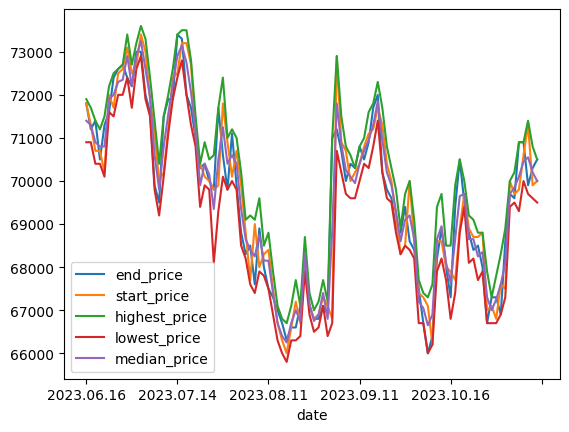

In [22]:
all_tables.plot(kind="line")

<Axes: xlabel='date'>

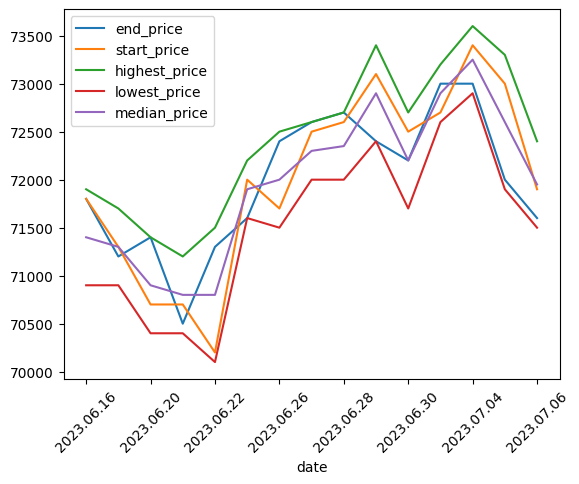

In [23]:
all_tables[:15].plot.line(rot=45)

median_price    Axes(0.125,0.11;0.775x0.77)
dtype: object

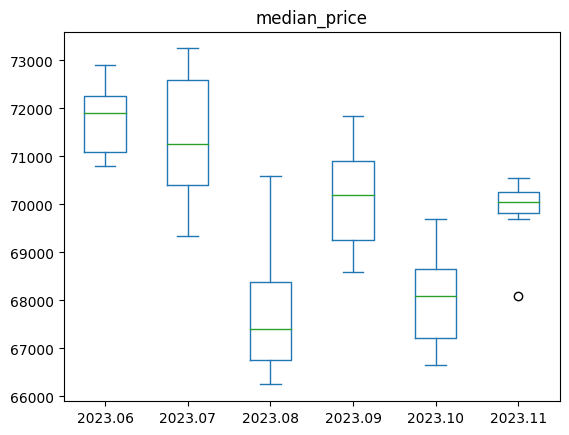

In [24]:
all_tables.plot(kind="box", column=["median_price"], by=["month"])